In [0]:
 """
Functions to be used 
"""
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from google.colab import files

def power_law(x,A, D):
    '''
    Power law function needed for fitting
    '''
    return A*np.power(x, D)

def linear(x, m, c):
    '''
    Linear function needed for fitting
    '''
    return m*x + c

def p_inf(k,m):
    '''
    p_inf for preferential attachment
    '''
    return (2*m*(m+1))/(k*(k+1)*(k+2))

def exp_k(x, A, B, E):
    return A*B**(E*x)

def k1_prf(N, m):
    '''
    k1 in preferential attachment
    '''
    num = -1 + np.sqrt(1+4*m*N*(m+1))
    return num / 2

def pure(k, m):
    '''
    p_inf pure random attachment
    '''
    return m**(k-m)/((1+m)**(k-m+1))

def k1_rnd(N, m):
    '''
    k1 in random attachment
    '''
    return m - (np.log(N) / (np.log(m) - np.log(m+1)))

def report(A):
        '''
        The number of edges and vertices in adjacency list
        '''
        s = 0
        for i in range(len(A)): 
             s += len(A[i])  
        edges_num = s // 2
        vertex_num = len(A)
        print('The number of edges is', edges_num)
        print('The number of vertices is', vertex_num)
        return edges_num, vertex_num
# logbin code given

def logbin(data, scale = 1., zeros = False):
    """
    logbin(data, scale = 1., zeros = False)

    Log-bin frequency of unique integer values in data. Returns probabilities
    for each bin.

    Array, data, is a 1-d array containing full set of event sizes for a
    given process in no particular order. For instance, in the Oslo Model
    the array may contain the avalanche size recorded at each time step. For
    a complex network, the array may contain the degree of each node in the
    network. The logbin function finds the frequency of each unique value in
    the data array. The function then bins these frequencies in logarithmically
    increasing bin sizes controlled by the scale parameter.

    Minimum binsize is always 1. Bin edges are lowered to nearest integer. Bins
    are always unique, i.e. two different float bin edges corresponding to the
    same integer interval will not be included twice. Note, rounding to integer
    values results in noise at small event sizes.

    Parameters
    ----------

    data: array_like, 1 dimensional, non-negative integers
          Input array. (e.g. Raw avalanche size data in Oslo model.)

    scale: float, greater or equal to 1.
          Scale parameter controlling the growth of bin sizes.
          If scale = 1., function will return frequency of each unique integer
          value in data with no binning.

    zeros: boolean
          Set zeros = True if you want binning function to consider events of
          size 0.
          Note that output cannot be plotted on log-log scale if data contains
          zeros. If zeros = False, events of size 0 will be removed from data.

    Returns
    -------

    x: array_like, 1 dimensional
          Array of coordinates for bin centres calculated using geometric mean
          of bin edges. Bins with a count of 0 will not be returned.
    y: array_like, 1 dimensional
          Array of normalised frequency counts within each bin. Bins with a
          count of 0 will not be returned.
    """
    import numpy as np
    if scale < 1:
        raise ValueError('Function requires scale >= 1.')
    count = np.bincount(data)
    tot = np.sum(count)
    smax = np.max(data)
    if scale > 1:
        jmax = np.ceil(np.log(smax)/np.log(scale))
        if zeros:
            binedges = scale ** np.arange(jmax + 1)
            binedges[0] = 0
        else:
            binedges = scale ** np.arange(1,jmax + 1)
            # count = count[1:]
        binedges = np.unique(binedges.astype('uint64'))
        x = (binedges[:-1] * (binedges[1:]-1)) ** 0.5
        y = np.zeros_like(x)
        count = count.astype('float')
        for i in range(len(y)):
            y[i] = np.sum(count[binedges[i]:binedges[i+1]]/(binedges[i+1] - binedges[i]))
            # print(binedges[i],binedges[i+1])
        # print(smax,jmax,binedges,x)
        # print(x,y)
    else:
        x = np.nonzero(count)[0]
        y = count[count != 0].astype('float')
        if zeros != True and x[0] == 0:
            x = x[1:]
            y = y[1:]
    y /= tot
    x = x[y!=0]
    y = y[y!=0]
    return x,y

def degree(A):
  '''
  Returns the degree sequence for a given adjacency list, A. 
  '''
  return [len(i) for i in A]


In [0]:
'''
Analysis for Networks: Random Walk
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

def walk(N, m, q, seed = 1):
   random.seed(seed)
   adj_list = []
   for i in range(m+1):        # initial network with m+1 vertices
    ori = list(range(m+1))   
    ori.remove(i)
    adj_list.append(ori)  

   for k in range(int(N) - len(adj_list)):
    w_0 = len(adj_list)
    node_list = [1, 1]           #  to initiliase the while loop
    while len(node_list) != len(set(node_list)):
      node_list = []
      while len(set(node_list)) < m:
        v_0 = random.choice(range(0,w_0))         # choosing a random existing vertex, v_0
        v_l = v_0                                 # becomes the current vertex v_l
        x = random.random()
        while x <= q:
          v_l1 = random.choice(adj_list[v_l])     # choosing from its neighbours   v_l --> v_(l+1)
          v_l = v_l1
          x = random.random()
        else:
          node_list.append(v_l)      # this becomes the end of walk

    adj_list.append([])                        # add new vertex
    w_1 = len(adj_list) - 1
    for i in node_list:
      adj_list[i].append(w_1)     # create edge
      adj_list[-1].append(i)    # create edge
   return adj_list


In [0]:
x_walk = walk(1000000, 4, 0.9)

0
42.84364432362959 -3.0376958657512367
[1.99718588 0.01363011]


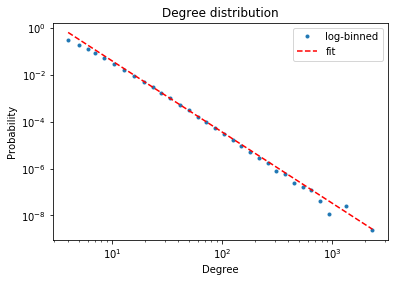

In [0]:
f = []
for i in x_walk:
  if len(i) != len(set(i)):
    f.append(i)

print(len(f))  # --> zero

degree_sequence_test = degree(x_walk)
x, y = logbin(degree_sequence_test, scale = 1.2)     # log-binned
(A, B), cov = curve_fit(power_law, x[10:], y[10:])
print(A, B)
error = np.sqrt(np.diag(cov))
print(error)

fig, ax = plt.subplots(1)
x_plot = np.linspace(1, 10000, 1000)
plt.loglog(x, y, '.', label = 'log-binned')
plt.loglog(x, power_law(x, A, B),'--', color = 'r', label = 'fit')
plt.title("Degree distribution")
plt.ylabel("Probability")
plt.xlabel("Degree")
plt.legend()
plt.show()     

In [0]:
# investigating different q's

walk_rnd = walk(1000000, 4, 0)
walk_mix = walk(1000000, 4, 0.5)
walk_prf = walk(1000000, 4, 0.9)

For q = 0, 2.039357718640453e-05 1.0
79613.52068336075 -5.064300433048223
[6.77723049e+04 1.89557304e-01]
46.20841895890523 -3.0716044303067442
[5.56492609 0.02648682]
For q = 1, 0.0017528385101613195 1.0


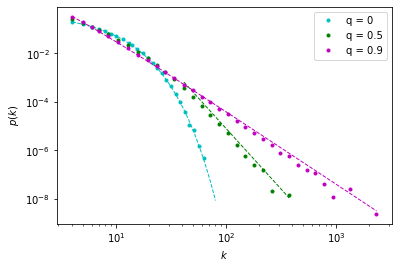

In [0]:
rnd = plt.figure()
# q = 0
degree_sequence_0 = degree(walk_rnd)
x, y = logbin(degree_sequence_0, scale = 1.1)     # log-binned
plt.loglog(x, y, '.', color = 'c', label = "q = 0")
x_ran = np.linspace(x[0], 80)
plt.loglog(x_ran, pure(x_ran, m = 4),'--', color = 'c', linewidth = 1.0)
y_0 = [pure(i, m = 4) for i in x]
stat, p_value = chisquare(y, y_0)  
print('For q = 0,', stat, p_value)

# q= 0.5
degree_sequence_05 = degree(walk_mix)
x, y = logbin(degree_sequence_05, scale = 1.2)     # log-binned
(A, B), cov = curve_fit(power_law, x[16:], y[16:])
print(A, B)
error = np.sqrt(np.diag(cov))
print(error)
plt.loglog(x, y, '.', color = 'g', label = "q = 0.5")
plt.loglog(x[12:], power_law(x[12:], A, -5),'--', color = 'g', linewidth = 1.0)
    
# q = 0.9
degree_sequence_09 = degree(walk_prf)
x, y = logbin(degree_sequence_09, scale = 1.2)     # log-binned
(A, B), cov = curve_fit(power_law, x[16:], y[16:])
print(A, B)
error = np.sqrt(np.diag(cov))
print(error)
plt.loglog(x, y, '.', color = 'm', label = "q = 0.9")
plt.loglog(x, p_inf(x, m=4),'--', color = 'm', linewidth = 1.0)
y_1 = [p_inf(i, m = 4) for i in x]
stat, p_value = chisquare(y, y_1)  
print('For q = 1,', stat, p_value)

#plt.title("Random Walk")
plt.ylabel("$p(k)$")
plt.xlabel("$k$")
plt.legend()
plt.show()     

rnd.savefig('random.pdf')
files.download('random.pdf') 